In [1]:
!python --version


Python 2.7.15 :: Anaconda, Inc.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
np.random.seed(100)

In [3]:
df = pd.read_csv('FyntraCustomerData.csv',sep=",",header="infer")

In [4]:
df.head(10)

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385


In [5]:
df.describe()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg_Session_Length      500 non-null float64
Time_on_App             500 non-null float64
Time_on_Website         500 non-null float64
Length_of_Membership    500 non-null float64
Yearly_Amount_Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [7]:
sns.set(style="white", color_codes=True)

In [8]:
df1 = df[['Time_on_Website','Yearly_Amount_Spent']]

In [9]:
df1.shape

(500, 2)

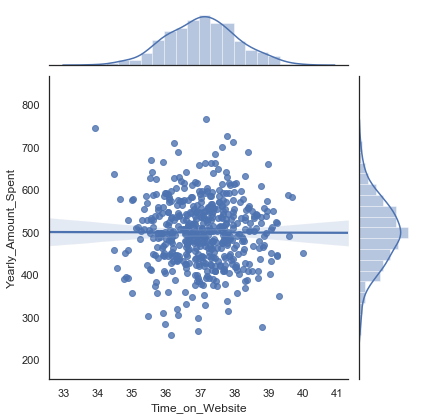

In [10]:
sns.jointplot(x="Time_on_Website", y="Yearly_Amount_Spent", data=df,kind="reg")

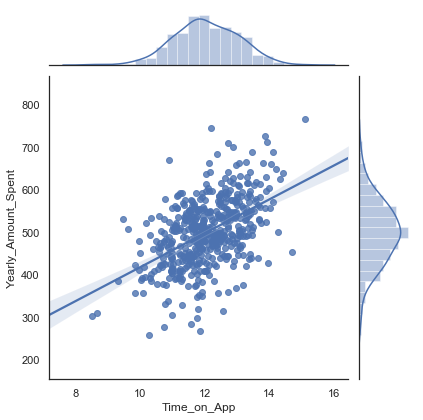

In [11]:
sns.jointplot(x="Time_on_App", y="Yearly_Amount_Spent", data=df,kind="reg")

In [12]:
sns.set(style="ticks", color_codes=True)

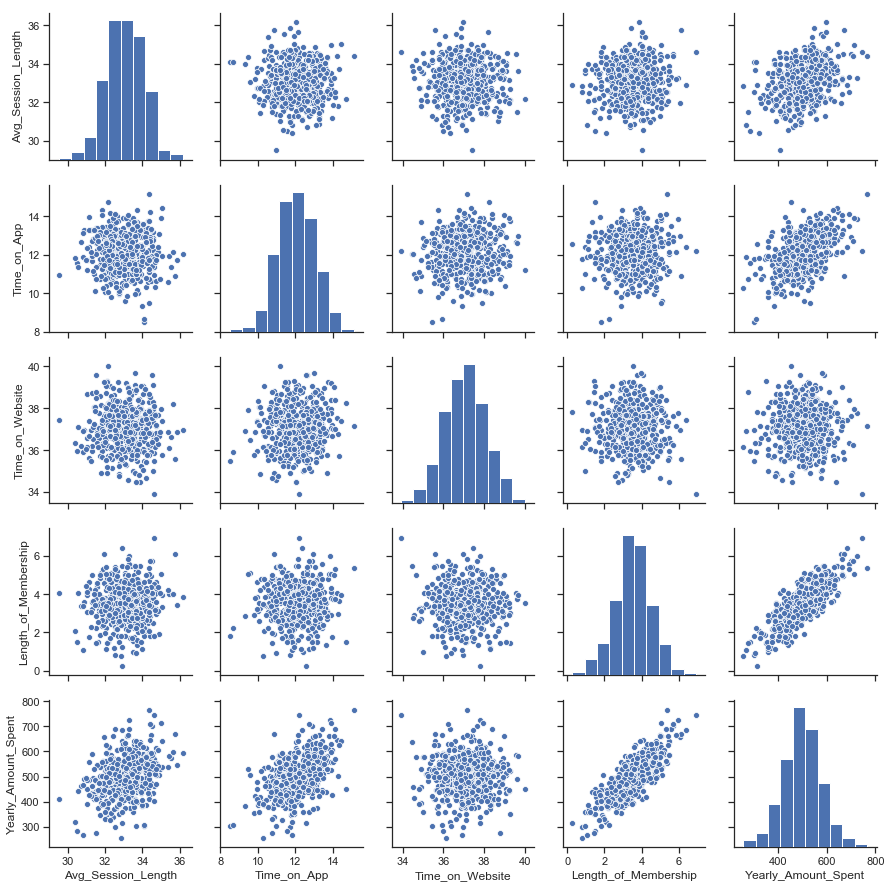

In [20]:
g = sns.pairplot(df)

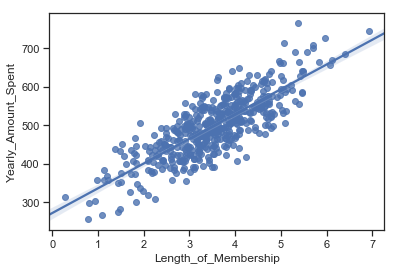

In [21]:
sns.regplot(x="Length_of_Membership",y="Yearly_Amount_Spent",data=df)

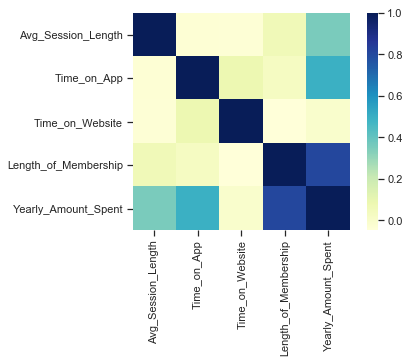

In [22]:
correlations = df.corr()
sns.heatmap(correlations,square = True, cmap = "YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [29]:
x = df.iloc[:,3:7]
y = df['Yearly_Amount_Spent']

In [32]:
x.shape

(500, 4)

In [33]:
y.shape

(500,)

In [35]:
import sklearn
import sklearn.cross_validation
X_train,X_test,Y_train,Y_test = sklearn.cross_validation.train_test_split(x,y,test_size=0.30,random_state=85)

In [41]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [42]:
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
Y_pred = lm.predict(X_test)

In [47]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

111.78111141321087


In [49]:
accuracy = lm.score(X_test,Y_test)
print(accuracy*100,'%')

(97.85393661057023, '%')


In [50]:
lm.coef_

array([26.08163249, 39.18778762,  0.40460005, 61.41777824])

In [52]:
lm.intercept_

-1067.3824276105236